In [1]:
# ===============================
# Imports
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# For cleaner plots
plt.style.use("default")
%matplotlib inline


# ===============================
# Load Dataset
# ===============================

df = pd.read_csv("insurance.csv")


In [2]:
# ===============================
# Drop target (unsupervised work)
# ===============================

df_features = df.drop("charges", axis=1)

# One-hot encode categoricals
df_encoded = pd.get_dummies(df_features, drop_first=True)

df_encoded.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [3]:
# ===============================
# Scale features
# ===============================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

X_scaled.shape


(1338, 8)

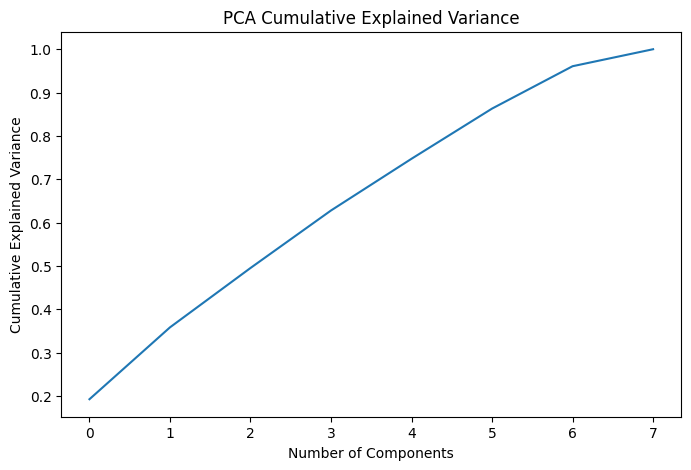

In [4]:
# ===============================
# Fit PCA
# ===============================

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.show()


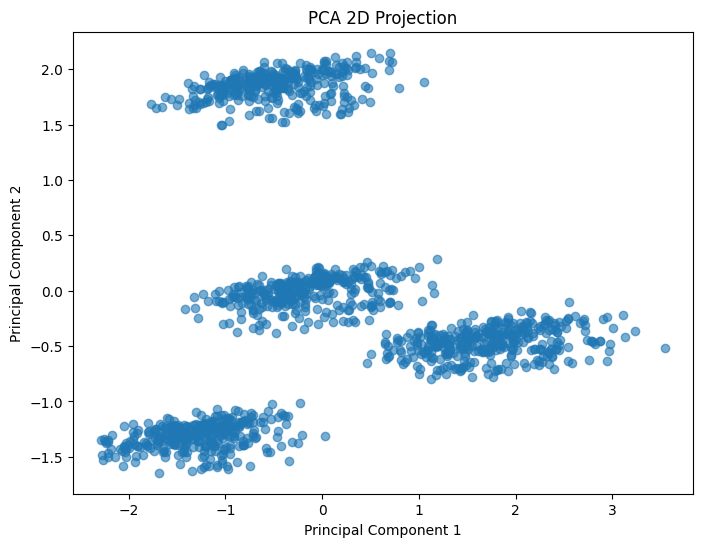

In [5]:
# ===============================
# 2D PCA Projection
# ===============================

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Projection")
plt.show()


In [6]:
# ===============================
# PCA Loadings
# ===============================

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(df_encoded.columns))],
    index=df_encoded.columns
)

loadings[["PC1", "PC2"]].sort_values("PC1", ascending=False)


,PC1,PC2
region_southeast,0.685558,-0.215390
bmi,0.488624,0.060011
smoker_yes,0.144787,-0.077796
sex_male,0.091927,-0.014186
age,0.068419,0.063869
children,-0.036457,0.033700
region_southwest,-0.174940,0.790180
region_northwest,-0.474583,-0.560494


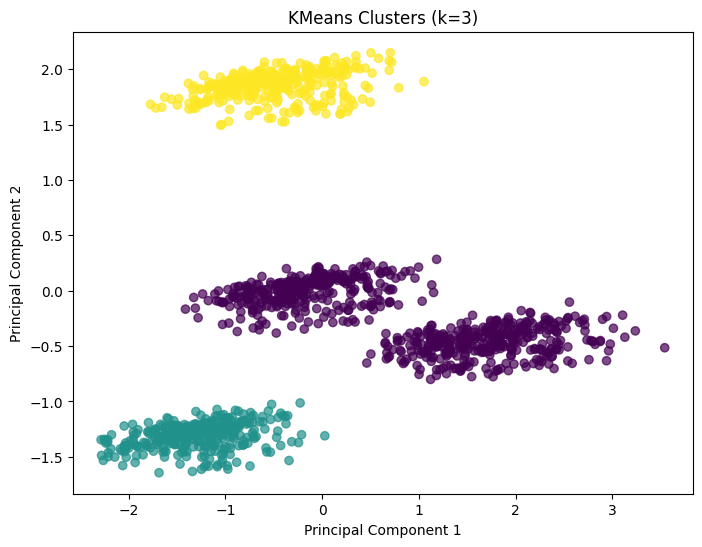

In [7]:
# ===============================
# KMeans Clustering
# ===============================

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize clusters in PCA space
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clusters (k=3)")
plt.show()


In [8]:
# Add cluster labels back to original df
df["cluster"] = clusters

df.groupby("cluster")["charges"].mean()


cluster
0    14109.532481
1    12417.575374
2    12346.937377
Name: charges, dtype: float64

In [10]:
df.groupby("cluster")[["age", "bmi", "children", "charges"]].mean()



,age,bmi,children,charges
cluster,,,,
0,39.094477,31.386330,1.047965,14109.532481
1,39.196923,29.199785,1.147692,12417.575374
2,39.455385,30.596615,1.141538,12346.937377
